In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
df = pd.read_csv("house_price.csv")
df.head(100)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
95,140,3,True,True,True,Rudhen,4.000000e+09,133333.33
96,110,2,True,True,True,West Pars,4.000000e+09,133333.33
97,70,2,True,False,True,Afsarieh,1.650000e+09,55000.00
98,128,3,True,True,True,Marzdaran,6.700000e+09,223333.33


In [236]:
df.Area = df.Area.apply(lambda x: int(x.replace(",", "")))

In [237]:
df.dropna(subset="Address", inplace=True)
df["Address"] = df["Address"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Area        3456 non-null   int64   
 1   Room        3456 non-null   int64   
 2   Parking     3456 non-null   bool    
 3   Warehouse   3456 non-null   bool    
 4   Elevator    3456 non-null   bool    
 5   Address     3456 non-null   category
 6   Price       3456 non-null   float64 
 7   Price(USD)  3456 non-null   float64 
dtypes: bool(3), category(1), float64(2), int64(2)
memory usage: 157.4 KB


In [238]:
df.describe()

,Area,Room,Price,Price(USD)
count,3.456000e+03,3456.000000,3.456000e+03,3.456000e+03
mean,8.802191e+06,2.081308,5.379957e+09,1.793319e+05
std,3.177783e+08,0.759723,8.121729e+09,2.707243e+05
min,3.000000e+01,0.000000,3.600000e+06,1.200000e+02
25%,6.900000e+01,2.000000,1.420000e+09,4.733333e+04
50%,9.000000e+01,2.000000,2.900000e+09,9.666667e+04
75%,1.210000e+02,2.000000,6.000000e+09,2.000000e+05
max,1.616000e+10,5.000000,9.240000e+10,3.080000e+06


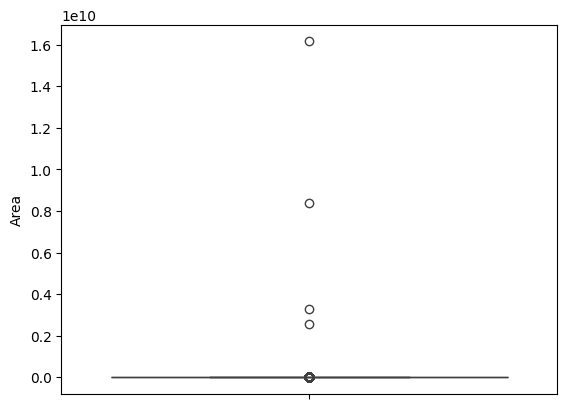

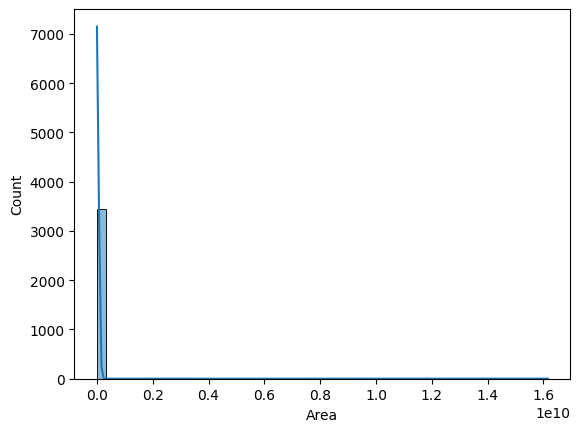

In [239]:
# Box plot to visualize outliers
sns.boxplot(df['Area'])
plt.show()

# Histogram to see the distribution
sns.histplot(df['Area'], bins=50, kde=True)
plt.show()

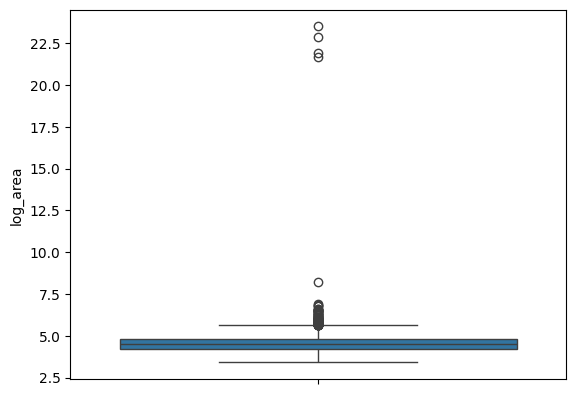

In [240]:
import numpy as np
df['log_area'] = np.log(df['Area'])

# Visualize again after log transformation
sns.boxplot(df['log_area'])
plt.show()

In [241]:
# custom_lower_bound = 30
# custom_upper_bound = 2000
# 
# filtered_df = df[(df['Area'] >= custom_lower_bound) & (df['Area'] <= custom_upper_bound)]
# filtered_df.describe()

8802191.396122685
317778301.5393436
4


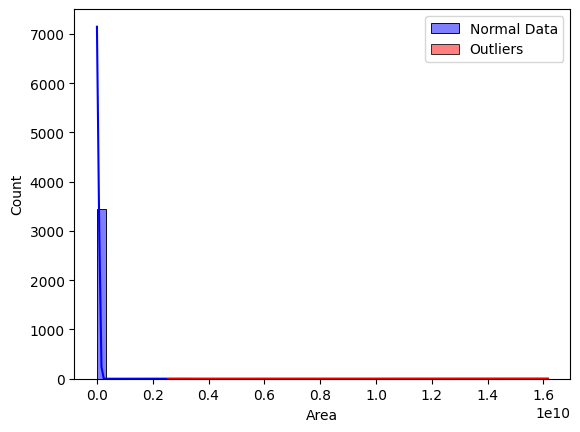

In [242]:
df['z_score'] = (df['Area'] - df['Area'].mean()) / df['Area'].std()
print(df['Area'].mean())
print(df['Area'].std())
outliers = df[np.abs(df['z_score']) > 3]
print(len(outliers))
# print(outliers)
# Plot the original data
sns.histplot(df['Area'], bins=50, kde=True, color='blue', label='Normal Data')

# Plot the outliers
sns.histplot(outliers['Area'], bins=50, kde=True, color='red', label='Outliers')

plt.legend()
plt.show()

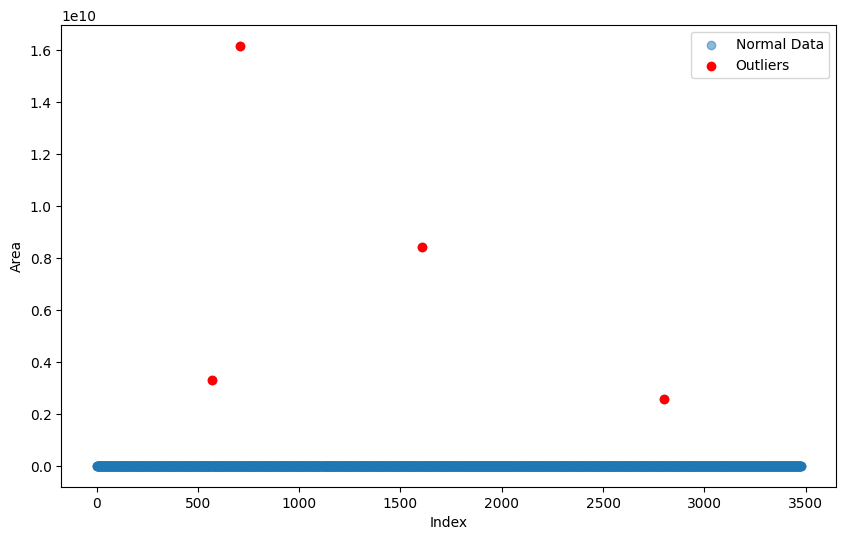

In [244]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Area'], alpha=0.5, label='Normal Data')
plt.scatter(outliers.index, outliers['Area'], color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Area')
plt.legend()
plt.show()


In [245]:
df = df[df['z_score'] < 3]
df.describe()

,Area,Room,Price,Price(USD),log_area,z_score
count,3452.000000,3452.000000,3.452000e+03,3.452000e+03,3452.000000,3.452000e+03
mean,108.188007,2.081112,5.377292e+09,1.792431e+05,4.550924,-2.769882e-02
std,92.734668,0.759998,8.123946e+09,2.707982e+05,0.464911,2.918219e-07
min,30.000000,0.000000,3.600000e+06,1.200000e+02,3.401197,-2.769906e-02
25%,69.000000,2.000000,1.419750e+09,4.732500e+04,4.234107,-2.769894e-02
50%,90.000000,2.000000,2.900000e+09,9.666667e+04,4.499810,-2.769887e-02
75%,120.000000,2.000000,6.000000e+09,2.000000e+05,4.787492,-2.769878e-02
max,3600.000000,5.000000,9.240000e+10,3.080000e+06,8.188689,-2.768783e-02


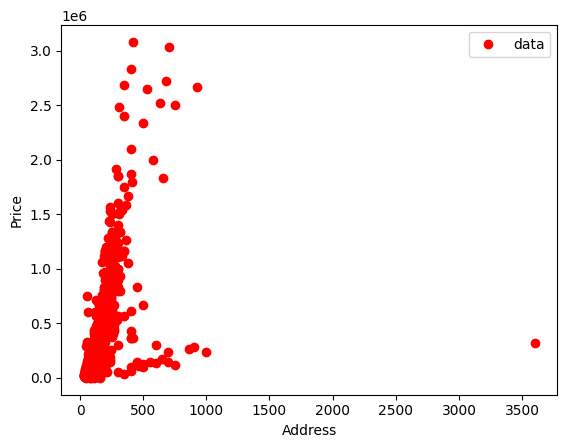

In [246]:
plt.plot(df["Area"], df["Price(USD)"], 'ro', label='data')
plt.legend(loc='best')
plt.ylabel('Price')
plt.xlabel('Address')
plt.show()